<a href="https://colab.research.google.com/github/ColorfulWave/machine-learning-practice/blob/main/SVM_Iris%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%81%AE%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# irisデータセットの取得

In [ ]:
import urllib.request as req
import pandas as pd

# 新しいIrisデータセットのURL
# scikit-learnがHugging Face上で公開しているIrisデータセットのCSVファイル
url = "https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv"
savefile = "iris.csv"
csv=pd.DataFrame()
try:
    req.urlretrieve(url, savefile)
    print("保存しました")
    csv = pd.read_csv(savefile, encoding="utf-8")
    display(csv.head()) # 最初の5行を表示してデータが正しく読み込めたか確認
except Exception as e:
    print(f"ファイルのダウンロードまたは読み込み中にエラーが発生しました: {e}")

保存しました


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


サポートベクターマシンのSupport Vector Classification (SVC)による分類

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #ここで、サポートベクターマシンのSupport Vector Classification (SVC)をロード
from sklearn.metrics import accuracy_score #モデルの学習結果の評価に使用

# アヤメのデータ
iris_data = csv

# アヤメのデータをラベル（目的変数）と入力データ（説明変数）に分類
y = iris_data.loc[:,"Species"] #locは、特定のコラムのデータを選択するコード
x = iris_data.loc[:,["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# 学習用とテスト用に分類する。
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,shuffle = True)

#学習
model = SVC()
model.fit(x_train,y_train)

#テスト
y_pred = model.predict(x_test)
print("正解率 = " , accuracy_score(y_test,y_pred))

正解率 =  0.9333333333333333


# 例題
サポートベクターの可視化

In [ ]:
# --- Google Colabで日本語表示を有効にする設定 ---
!pip install japanize-matplotlib # 日本語表示用のライブラリをインストール

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d6ef64835dae7e7e009f192ad4c35bb22c7f8b31a875da591861251adb7b5976
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


2特徴量SVM（可視化用）の正解率: 1.0


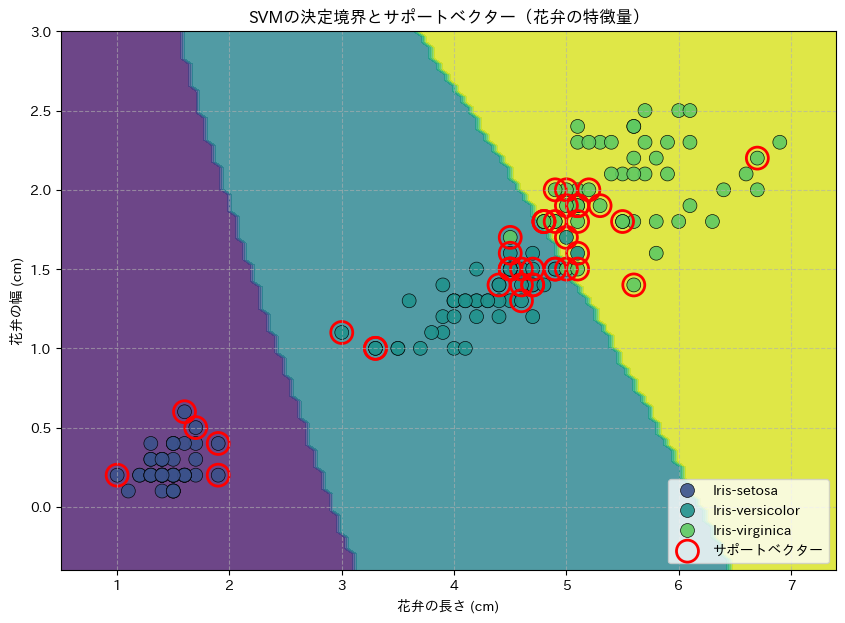

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import japanize_matplotlib # インポートすることで自動的にフォント設定が適用されます

# --- 可視化コード（2つの特徴量を使用） ---

# 1. 2D可視化のために2つの特徴量を選択
# アヤメの分類では、花弁の長さと幅がしばしば良い分離を示すため、これらを使用します。
x_2d = iris_data.loc[:, ["PetalLengthCm", "PetalWidthCm"]]
y_2d = iris_data.loc[:, "Species"] # プロットのためにSpecies列全体を使用

# 2. 可視化専用モデルのための2Dデータ分割
# プロットの再現性のため、random_stateを使用
x_train_2d, x_test_2d, y_train_2d, y_test_2d = train_test_split(x_2d, y_2d, test_size=0.2, random_state=42, shuffle=True)

# 3. 2D可視化専用の新しいSVCモデルを学習
# 可視化をより明確にするために、'kernel'や'C'の値を試すことができます。
# 'linear'カーネルは直線的な決定境界を生成します。
# 'rbf'（デフォルト）はより複雑な曲線的な決定境界を生成できます。
model_2d_viz = SVC(kernel='rbf', C=1) # RBFカーネルを使用、C=1は一般的な開始点
model_2d_viz.fit(x_train_2d, y_train_2d)

# 2Dモデルの正解率を計算（オプションですが、確認のために推奨）
y_pred_2d_viz = model_2d_viz.predict(x_test_2d)
print("2特徴量SVM（可視化用）の正解率:", accuracy_score(y_test_2d, y_pred_2d_viz))


# 4. 決定境界とサポートベクターのプロット

plt.figure(figsize=(10, 7))

# 決定境界をプロットするためのメッシュグリッドを作成
# 可視化範囲をデータ点より少し広めに設定
x_min, x_max = x_2d.iloc[:, 0].min() - 0.5, x_2d.iloc[:, 0].max() + 0.5
y_min, y_max = x_2d.iloc[:, 1].min() - 0.5, x_2d.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), # X軸の範囲を100分割
                     np.linspace(y_min, y_max, 100)) # Y軸の範囲を100分割

# メッシュグリッド内の各点に対してクラスを予測
# contourfでカラーマップを使用するために、文字列の品種名を数値にマッピングする必要がある
unique_species = model_2d_viz.classes_ # モデルが学習したユニークな品種名を取得
species_map = {species: i for i, species in enumerate(unique_species)} # 品種名と数値の対応マップを作成

# 予測結果を整形してcontourfに渡す
Z_str = model_2d_viz.predict(np.c_[xx.ravel(), yy.ravel()]) # グリッド点を平坦化して予測
Z_mapped = np.array([species_map[s] for s in Z_str]).reshape(xx.shape) # 予測結果を数値にマッピングし、元のグリッド形状に戻す


# 決定境界の背景色（予測領域）を塗りつぶしでプロット
plt.contourf(xx, yy, Z_mapped, alpha=0.8, cmap=plt.cm.viridis)

# 元のデータ点（訓練データ）をプロット
# 元のy値もプロットのために数値にマッピング
y_mapped_original = np.array([species_map[s] for s in y_2d])

sns.scatterplot(x=x_2d.iloc[:, 0], y=x_2d.iloc[:, 1], hue=y_2d, # X軸、Y軸、色分け（品種）
                palette='viridis', s=100, alpha=0.9, edgecolor='k', linewidth=0.5,
                legend='full') # 凡例を完全に表示

# サポートベクターをプロット
# model_2d_viz.support_vectors_ には、実際のサポートベクターの座標が格納されています
plt.scatter(model_2d_viz.support_vectors_[:, 0], # サポートベクターのX座標
            model_2d_viz.support_vectors_[:, 1], # サポートベクターのY座標
            s=250,           # 円のサイズ
            facecolors='none', # 塗りつぶしなし
            edgecolors='red',  # 赤い枠線
            linewidths=2,    # 枠線の太さ
            label='サポートベクター') # 凡例のラベル


plt.title('SVMの決定境界とサポートベクター（花弁の特徴量）') # グラフタイトル
plt.xlabel('花弁の長さ (cm)') # X軸ラベル
plt.ylabel('花弁の幅 (cm)')   # Y軸ラベル
plt.xlim(xx.min(), xx.max()) # X軸の表示範囲を設定
plt.ylim(yy.min(), yy.max()) # Y軸の表示範囲を設定
plt.grid(True, linestyle='--', alpha=0.6) # グリッド線を表示
plt.legend(loc='lower right') # 凡例の位置
plt.show() # グラフを表示